# Titanic Prediction with SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics

In [7]:
df = pd.read_csv('../input/train-dataset/train.csv')

In [8]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### drop unnecessary features 

In [9]:
df = df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


***percentage of null values***

In [12]:
df.isna().sum() / len(df) * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

## ***Dealing with missing values***
***fill age nan values with mean of them***

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Embarked'] = df['Embarked'].fillna('S')

## EDA

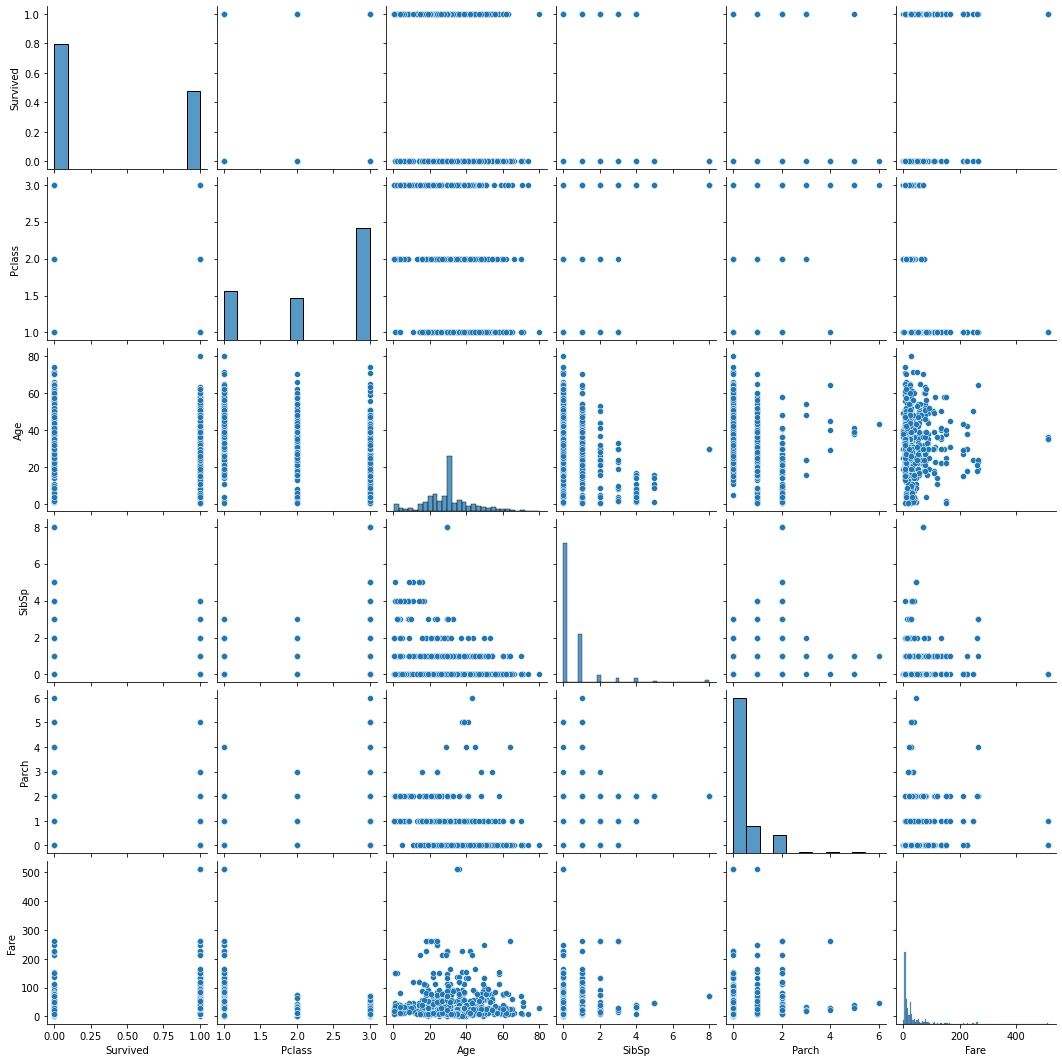

In [17]:
sns.pairplot(df)

In [20]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

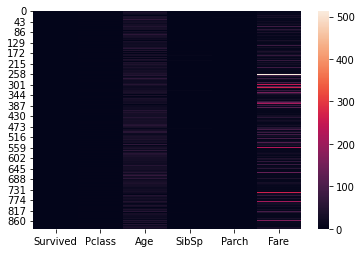

In [23]:
df_num = df.select_dtypes(exclude=object)
sns.heatmap(df_num)

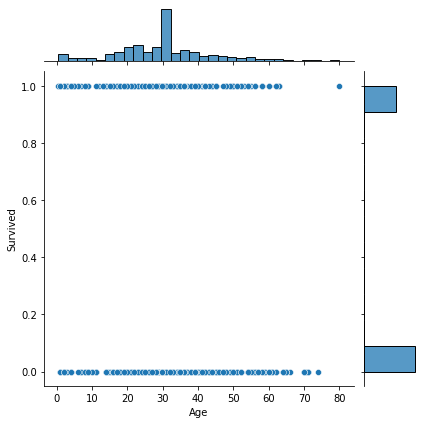

In [25]:
sns.jointplot(data=df, x=df['Age'], y=df['Survived'])

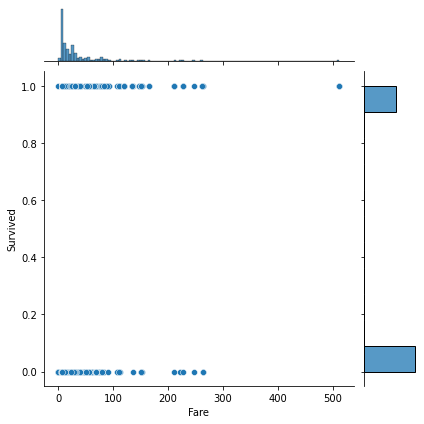

In [26]:
sns.jointplot(data=df, x=df['Fare'], y=df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

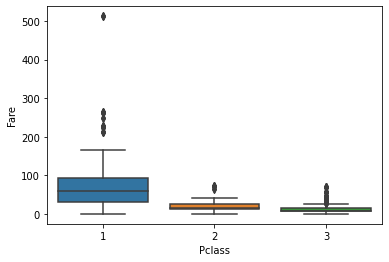

In [28]:
sns.boxplot(data=df, x=df['Pclass'], y=df['Fare'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

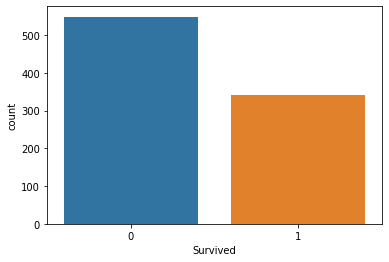

In [33]:
sns.countplot(data=df, x=df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

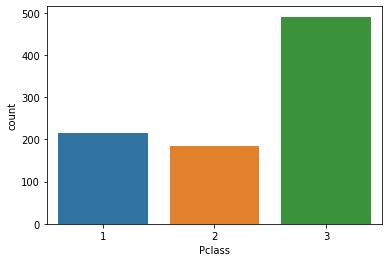

In [35]:
sns.countplot(data=df, x=df['Pclass'])

Text(0.5, 0, 'Survived')

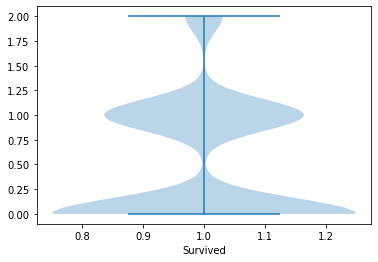

In [163]:
plt.violinplot(df['Survived'])
plt.xlabel('Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

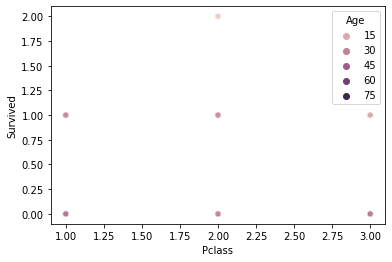

In [142]:
sns.scatterplot(data=df, x=df['Pclass'], y=df['Survived'], hue=df['Age'])

Text(0, 0.5, 'Survived')

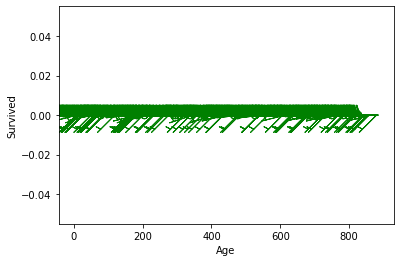

In [166]:
plt.barbs(df['Age'], df['Survived'], color='green')
plt.xlabel('Age')
plt.ylabel('Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

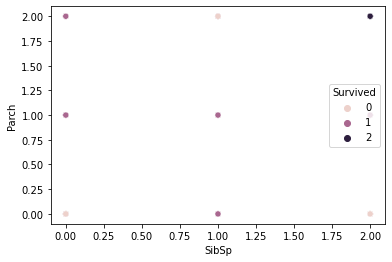

In [143]:
sns.scatterplot(data=df, x=df['SibSp'], y=df['Parch'], hue=df['Survived'])

## *outliers...*

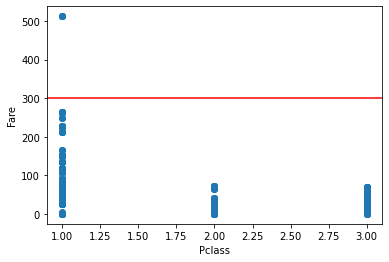

In [37]:
plt.scatter(df['Pclass'], df['Fare'])
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.axhline(300, color='red')

In [42]:
df.drop(df[df['Fare'] > 500].index, axis=0, inplace=True)

In [50]:
df.drop(df[(df['Embarked'] == 'Q') & (df['Fare'] > 50)].index, axis=0, inplace=True)

Text(0, 0.5, 'Fare')

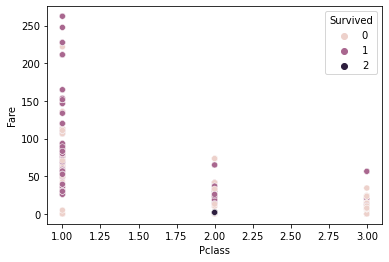

In [168]:
sns.scatterplot(x=df['Pclass'], y=df['Fare'], hue=df['Survived'])
plt.xlabel('Pclass')
plt.ylabel('Fare')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

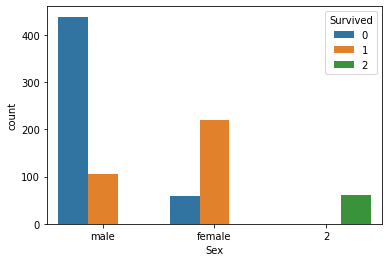

In [173]:
sns.countplot(df['Sex'], hue=df['Survived'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

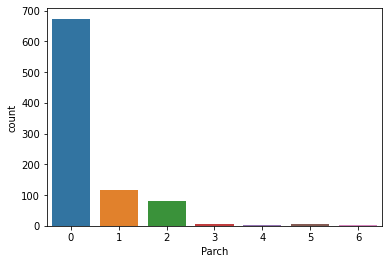

In [63]:
sns.countplot(df['Parch'])

In [65]:
df['Parch'].value_counts()

0    674
1    117
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [67]:
df[df['Parch'] > 2] = 3

In [74]:
df['SibSp'].value_counts()

0    601
1    198
3     31
2     26
4     18
8      7
5      5
Name: SibSp, dtype: int64

In [75]:
df[df['SibSp'] > 2] = 2

### ***One hot encoding***

In [80]:
final_df = pd.get_dummies(df, drop_first=True)

In [81]:
final_df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0


<AxesSubplot:>

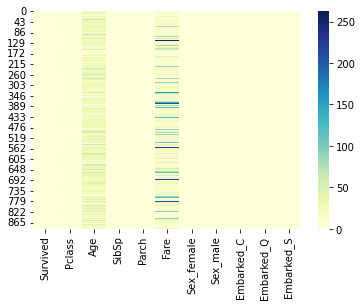

In [155]:
sns.heatmap(final_df, cmap="YlGnBu")

## *preprocessing, train-test-split the Data*

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [83]:
X = final_df.drop('Survived', axis=1)
y = final_df['Survived']

In [85]:
X = StandardScaler().fit_transform(X)

In [88]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15, random_state=42)

In [89]:
train_x[:3]

array([[-0.31966528, -1.87175007,  2.3822343 ,  2.33481255, -0.65422916,
        -0.67973981, -1.26421536, -0.47659922, -0.29288959, -1.41541154],
       [ 0.91174096, -0.66562232, -0.63299368, -0.52836242, -0.50378406,
        -0.67973981,  0.79100447, -0.47659922, -0.29288959,  0.7065083 ],
       [-0.31966528, -1.87175007,  2.3822343 ,  2.33481255, -0.65422916,
        -0.67973981, -1.26421536, -0.47659922, -0.29288959, -1.41541154]])

## ***model building with Support Vector Classifier***

In [145]:
model = SVC().fit(train_x, train_y)
yhat = model.predict(test_x)
yhat_train = model.predict(train_x)

In [146]:
# accuracy score on test data
metrics.accuracy_score(test_y, yhat)

0.8646616541353384

In [147]:
# accuracy score on train data
metrics.accuracy_score(train_y, yhat_train)

0.8432934926958832

In [154]:
metrics.confusion_matrix(test_y, yhat)

array([[77,  3,  0],
       [15, 32,  0],
       [ 0,  0,  6]])

## Final Step: *GridSearchCV*

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
params = {'C':[.001, .01, .1, 1, 10, 100, 1000], 'gamma':[1, .1, .001, .0001], 'kernel':['rbf', 'linear']}

In [117]:
grid = GridSearchCV(model, params, cv=5)

In [118]:
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [128]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [130]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [131]:
grid.best_score_

0.8286799116997793

In [125]:
yhat_grid = grid.predict(test_x)
yhat_train_grid = grid.predict(train_x)

In [133]:
metrics.confusion_matrix(test_y, yhat_grid)

array([[77,  3,  0],
       [15, 32,  0],
       [ 0,  0,  6]])

In [135]:
metrics.classification_report(test_y, yhat_grid)

'              precision    recall  f1-score   support\n\n           0       0.84      0.96      0.90        80\n           1       0.91      0.68      0.78        47\n           2       1.00      1.00      1.00         6\n\n    accuracy                           0.86       133\n   macro avg       0.92      0.88      0.89       133\nweighted avg       0.87      0.86      0.86       133\n'

In [137]:
# accuracy score on train data
metrics.accuracy_score(test_y, yhat_grid)

0.8646616541353384